In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pth = os.path.join('..', '..')
pth_data = os.path.join(pth, 'data')
pth_attr = os.path.join(pth_data, 'modeling', 'regression', 'attribution')
# pth_out = os.path.join(pth, 'figures', 'cancer', 'CCCA')

In [3]:
adata = sc.read_h5ad(os.path.join(pth_attr, 'CCCA.h5ad'))
adata

AnnData object with n_obs × n_vars = 1438665 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'viral', 'location', 'cancer_type', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'core

In [4]:
fn = os.path.join(pth_data, 'summary.csv')
df = pd.read_csv(fn, index_col = 0)

/tmp/ipykernel_1374649/3570046875.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),
/tmp/ipykernel_1374649/3570046875.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),
/tmp/ipykernel_1374649/3570046875.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),
/tmp/ipykernel_1374649/3570046875.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),
/tmp/ipykernel_1374649/3570046875.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. af

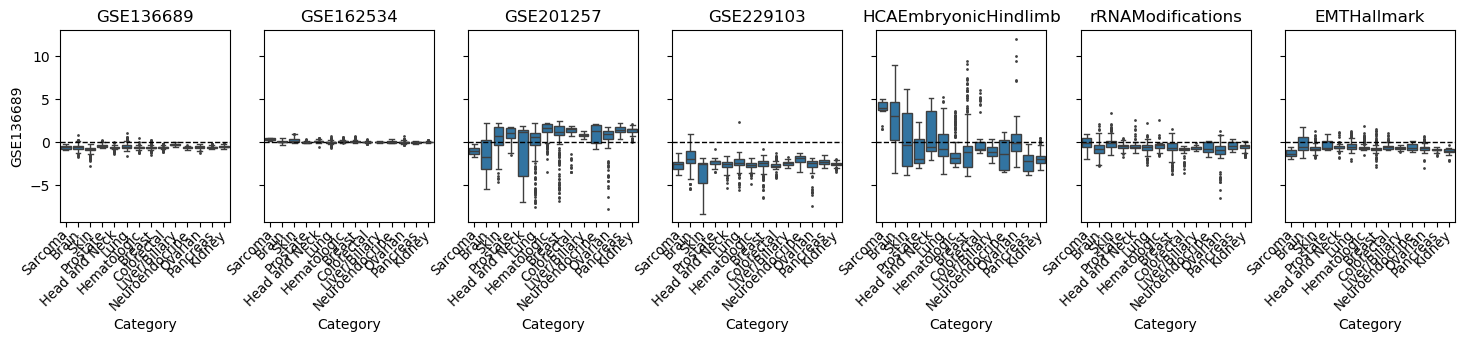

In [6]:
disease_plt = [
    'Synovial Sarcoma',
    'Medulloblastoma',
    'Ependymoma',
    'Low-Grade Glioma']

# feat_plt = [
#     'GSE162534',
#     'GSE229103',
#     'GSE136689',
#     'HCAEmbryonicHindlimb',
#     'rRNAModifications']
feat_plt = df.loc[df.Features].index

groupby = ['Category', 'source', 'sample']

disease = adata.obs.Disease.map({
    'Synovial Sarcoma'                : 'Synovial Sarcoma',
    'Medulloblastoma'                 : 'Medulloblastoma',
    'Pediatric Ependymoma'            : 'Ependymoma',
    'IDH-Mutant Astrocytoma'          : 'Low-Grade Glioma',
    'IDH-Mutant Oligodendroglioma'    : 'Low-Grade Glioma'})

fig, ax = plt.subplots(1, len(feat_plt), figsize = (18, 2.5), sharey = True)
for i, src in enumerate(feat_plt):
    # msk = (disease == name)
    df_plt = (pd.concat((adata.obsm['attributions'],
                        adata.obs[groupby], adata.obs.latent_z_reg), axis = 1)
              .groupby(groupby, observed = True).mean())

    order = df_plt.groupby('Category', observed = True).latent_z_reg.mean().sort_values(ascending = False).index

    # print(name)
    sns.boxplot(df_plt, x = 'Category', y = src, order = order, fliersize = 1, ax = ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),
                   size = 9.5, rotation = 45,
                   rotation_mode = 'anchor',
                   ha = 'right', va = 'center')
    # ax[i].set_ylim(-5, 5)
    ax[i].axhline(0, c = 'k', ls = '--', linewidth = 1)
    # ax[i].set_xticks([])
    ax[i].set_title(src)
plt.show()



In [ ]:
# fn = os.path.join(pth_out, '.pdf')
# plt.savefig(fn, bbox_inches = 'tight')